In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%load_ext lab_black
#
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as units
import pickle

#
plt.style.use("mls_scf")

In [2]:
%autoreload 2
import dualpy as dp

In [3]:
dt0 = np.array([0.0]) * units.s  # np.array([0.0, 0.0]) * units.s
dt0 = dp.seed(dt0, "dt0")
a = np.array([10.0]) * units.m
# a = dp.seed(a, "a")
omega = np.array([2 * np.pi / 30]) * units.rad / units.s
# omega = dp.seed(omega, "omega")
dt1 = units.Quantity([0.0, 0.0]) * units.s
# dt1 = dp.seed(dt1, "dt1")

In [4]:
def one_calculation(dt0, a, omega, dt1):
    t0 = np.arange(0, 100, 0.1) * units.s + dt0  # [0] + 2 * dt0[1]
    print(f"t0[0:10] is {t0[0:10]}")
    x0 = a * np.sin(omega * (t0 - units.Quantity(dt0)))
    t1 = (
        np.arange(0, 100, 2) * units.s
        + 0.05 * units.s
        # + 3 * dt1[0]
        # + 4 * dt1[1]
        # + 10 * (0.1 * units.s) * (a / (10.0 * units.m))
    )
    return t0, x0, t1, dp.CubicSplineLinearJacobians(t0, x0)(t1)

In [5]:
t0, x0, t1, x1_example = one_calculation(dt0, a, omega, dt1)

t0[0:10] is [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9] s


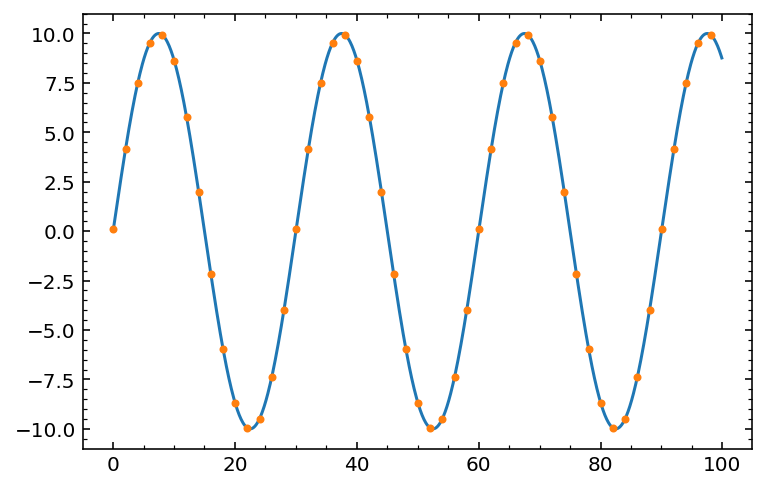

In [6]:
plt.plot(t0, x0)
plt.plot(t1, x1_example, ".")
plt.show()

In [7]:
def wrapper(*args):
    return one_calculation(*args)[-1]

In [8]:
x1_ana, x1_num = dp.compute_numeric_jacobians(wrapper, (dt0, a, omega, dt1))

t0[0:10] is [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9] s
t0[0:10] is [3.45266977e-04 1.00345267e-01 2.00345267e-01 3.00345267e-01
 4.00345267e-01 5.00345267e-01 6.00345267e-01 7.00345267e-01
 8.00345267e-01 9.00345267e-01] s
Result: [-7.23086085e-04 -6.57502668e-04 -4.78231062e-04 -2.16268961e-04
  8.30880087e-05  3.68078307e-04  5.89424521e-04  7.08853882e-04
  7.05715966e-04  5.80553349e-04  3.55007783e-04  6.80781469e-05
 -2.30622820e-04 -4.89447005e-04 -6.63641357e-04 -7.23086090e-04
 -6.57502668e-04 -4.78231062e-04 -2.16268961e-04  8.30880087e-05
  3.68078307e-04  5.89424521e-04  7.08853882e-04  7.05715966e-04
  5.80553349e-04  3.55007783e-04  6.80781469e-05 -2.30622820e-04
 -4.89447005e-04 -6.63641357e-04 -7.23086090e-04 -6.57502668e-04
 -4.78231062e-04 -2.16268961e-04  8.30880087e-05  3.68078307e-04
  5.89424521e-04  7.08853882e-04  7.05715966e-04  5.80553349e-04
  3.55007783e-04  6.80781469e-05 -2.30622820e-04 -4.89447005e-04
 -6.63641357e-04 -7.23086090e-04 -6.57502668e-04 -4.7

In [9]:
term = "dt0"
j_ana = x1_ana.jacobians[term].todensearray().squeeze()
j_num = x1_num.jacobians[term].todensearray().squeeze()
dj = j_ana - j_num

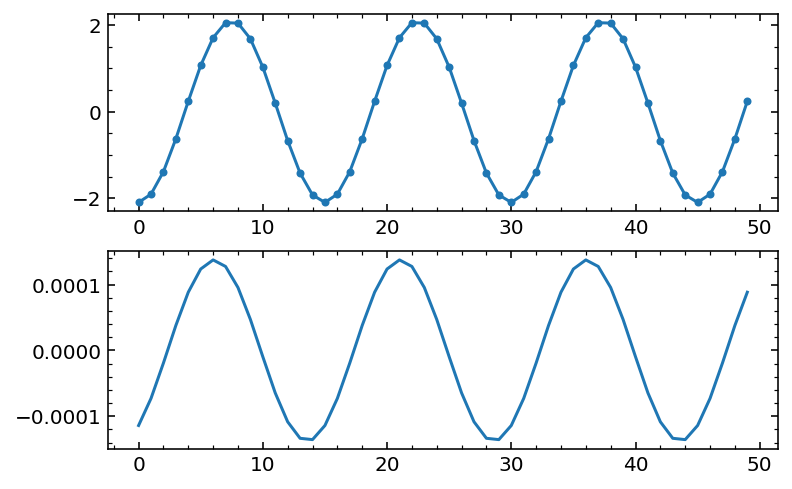

In [11]:
fig, ax = plt.subplots(2)
ax[0].plot(j_ana)
ax[0].set_prop_cycle(None)
ax[0].plot(j_num, ".")
ax[1].plot(dj)
plt.show()